# Introduction
Online harassment has become a growing concern in today's digital age, with social media platforms being a primary site of such harassment. To address this issue, these platforms have developed community guidelines that outline their policies to online harassment. However, there is a lack of understanding of how these policies actually characterize harassment, what the responses are by the platform and how these policies differ across platforms.
This study aims to provide insights into the policies of three major social media platforms - Facebook, TikTok, and YouTube - by analyzing the text conten of their community guidelines. Specifically, it uses three text analysis techniques - lexical density, term frequency, and TF-IDF - to examine the language used in these policies, the prominence given to the term "harassment" and its variations, and the most important words and concepts emphasized in each policy. This analysis intends to shed light on the motivations of social media platforms in issuing these policies, the level of transparency around the characterization of harassment, and the focus on concrete actions in addressing online harassment. Ultimately, this study seeks to contribute to the ongoing discourse on the effectiveness of social media policies in addressing online harassment and be used as a resource for future policy development.

# Method

As online harassment directly affects the user of the platform, this study focuses on community guidelies documents as they are public-facing and directly relevant to the user. To collect data for this project, web scraping techniques were used to extract the community guidelines documents from each platform. As the issues covered by these guidelines are wide-ranging, this analysis specifically scraped text from the harassment and bullying subsections of the policy and the links provided on those pages. This text provides a comprehensive overview of how each platform characterizes and defines online harassment and is the corpus for the analysis.

Following data collection, lexical density analysis was used to measure the complexity and density of the language used in the harassment section of the community guidelines documents in order to provide insight into the robustness/motivations of each platform's response. Term frequency was used to to identify the overall content and themes used by each harassment policy and how approaches differed per platform. Finally, TF-IDF was used to identify the most important words in each document to help capture the unique priorities of each policy response and how they take action.  

# Data Collection
## Web Scraping
To conduct the analysis, the first step was to establish a corpus and collect text from the Community Guidelines documents of YouTube, Facebook/Meta, and TikTok that focus on online harassment. Text was collected from the bullying/harassment subsections of each policy document to ensure the text was relevant and the analysis was internally valid. However, as these policy sections often linked to other facets of the guidelines, the URLs on each page were also extracted. Following the data collection, three separate csv files were created for each platform, and the text was scraped from each file to create three separate text files that could be compared in the analysis.

### YouTube

In [19]:
#The following script is adapted from the Geeks for Geeks “BeautifulSoup – Scraping Link from HTML” tutorial: 
#https://www.geeksforgeeks.org/beautifulsoup-scraping-link-from-html/![image-3.png](attachment:image-3.png)

In [91]:
#import necessary libraries/modules
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer  
import matplotlib.pyplot as plt
import glob

In [92]:
# define function to retrieve HTML document from URL
def getHTMLdocument(url):
    response = requests.get(url)
    return response.text

In [93]:
# define URL to scrape
url_to_scrape = "https://support.google.com/youtube/answer/2802268?hl=en&ref_topic=9282436"

In [94]:
# call the function to retrieve HTML document
html_document = getHTMLdocument(url_to_scrape)

In [95]:
# use BeautifulSoup to parse the HTML document
soup = BeautifulSoup(html_document, 'html.parser')

In [96]:
# find all the anchor tags with "href" attribute starting with "https://"
for link in soup.find_all('a', attrs={'href': re.compile("^https://")}):
    # display the actual urls
    print(link.get('href')) 

https://www.google.com/intl/en/about/products?tab=uh
https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=http://support.google.com/youtube/answer/2802268%3Fhl%3Den%26ref_topic%3D9282436&ec=GAZAdQ
https://support.google.com/youtube/answer/2802027#report_channel
https://www.youtube.com/creators/safety/
https://creatoracademy.youtube.com/page/lesson/safe-community


After collecting all the URLs, it was possible to scrape the text from each link to create text files.

In [3]:
# The following script is adapted from (Krisel, 2023) https://github.com/intro-to-text-analysis-SIPA-S23/syllabus

In [97]:
# read CSV file containing URLs to scrape
data_df= pd.read_csv("Community Guidelines YouTube - Sheet1.csv", delimiter=',', encoding='utf-8')

In [98]:
# clean the data, drop rows where 'URL' column is 'no URL found'
index_names = data_df[ data_df['URL'] == 'no URL found' ].index
data_df.drop(index_names, inplace = True)

In [99]:
# create a DataFrame with the URLs to scrape
YouTube_urls = data_df
YouTube_urls = YouTube_urls.dropna()

In [100]:
# define function to scrape article from URL
def scrape_article(URL):
    response = requests.get(URL)
    response.encoding = 'utf-8'
    html_string = response.text
    return html_string

In [101]:
# apply the 'scrape_article' function to each URL in the DataFrame and store the resulting HTML in a new column 'text'
YouTube_urls['text'] = YouTube_urls['URL'].apply(scrape_article)

In [102]:
# display the DataFrame with the scraped HTML
YouTube_urls

,Platform,URL,text
0,YouTube,https://www.google.com/intl/en/about/products?...,"\n\n<!DOCTYPE html>\n\n\n<html lang=""en"" dir=""..."
1,YouTube,https://accounts.google.com/ServiceLogin?hl=en...,"<!doctype html><html lang=""en"" dir=""ltr""><head..."
2,YouTube,https://support.google.com/youtube/answer/2802...,"<!doctype html><html class=""hcfe"" data-page-ty..."
3,YouTube,https://www.youtube.com/creators/safety/,"<!DOCTYPE html>\n<html data-generated-by=""stal..."
4,YouTube,https://creatoracademy.youtube.com/page/lesson...,"<!DOCTYPE html><html style=""font-size: 10px;fo..."




<!DOCTYPE html>


<html lang="en" dir="ltr" class="google glue-flexbox optimize-TzA3t4qBTO6NJPW7BM7khA"  locale="ALL_us" user-region="" path="/products/">
  <head>
  <script nonce="3dgP4K7G5udm4iqdEjU1WQ">
    var dataLayer = dataLayer || [];
    dataLayer.push({locale_fallback: "all_us"});
  </script>
  <script async src="https://www.googleoptimize.com/optimize.js?id=GTM-T4DMR6H" nonce="3dgP4K7G5udm4iqdEjU1WQ"></script>
    <meta charset="utf-8">
    <meta content="initial-scale=1, minimum-scale=1, width=device-width" name="viewport">
    <title>Browse All of Google&#39;s Products &amp; Services - Google</title>
    <meta name="description" content="Browse a list of Google products designed to help you work and play, stay organized, get answers, keep in touch, grow your business, and more.">

    <script type="text/javascript" nonce="3dgP4K7G5udm4iqdEjU1WQ">
    window.dataLayer = window.dataLayer || [];
    window.dataLayer.push({
       'gtm.blacklist':['customScripts','nonGoogleS
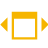
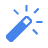
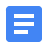
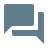
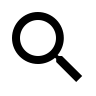

In [103]:
# print the text of each article
for text in YouTube_urls['text']:
    print(text)

In [104]:
# print the text of each article after removing HTML tags
for text in YouTube_urls['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()
    print(article)







Browse All of Google's Products & Services - Google
































Jump to content




                About
              














                  About
                



                  Google in the U.S.
                



                  Products
                



                  Commitments
                



                  Stories
                



                  The Keyword
                








                    About Google
                      Our mission, products, and impact



More about our core commitments



                    Belonging
                      Expanding what's possible for everyone




                    Learning
                      Unlocking opportunity with education & career tools




                    Safety Center
                      Keeping billions of people safe online




                    Crisis Response
                      Helping people with information in critical moments




In [105]:
# save the text of each article to a text file
with open("all_articles.txt","w") as file:
    for text in YouTube_urls['text']:
        soup = BeautifulSoup(text)
        article = soup.get_text()
        file.write(article)

In [106]:
# create a directory to store the cleaned text files
! mkdir files

mkdir: files: File exists


In [107]:
# iterate over each article, remove HTML tags, and save the cleaned text to a separate file in the 'files' directory
id = 0
for text in YouTube_urls['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()
    
    id += 1
    with open(f"files/article_{id}.txt", "w") as file:
        file.write(str(article))

In [108]:
! cd files

In [109]:
! ls files

article_1.txt article_2.txt article_3.txt article_4.txt article_5.txt


In [110]:
! cd .. 

To facilitate my analysis, I combined each text file into one large text file. 

In [4]:
#The following script is adapted from stackoverflow public questions forum https://stackoverflow.com/questions/13613336/how-do-i-concatenate-text-files-in-python and from (Krisel, 2023)

In [238]:
#clean the data. Remove stopwards 
from nltk.corpus import stopwords as nltk_stopwords
from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer    
import matplotlib.pyplot as plt

stops = nltk_stopwords.words('english')

In [10]:
# Create a function to derive the Part of Speech (POS) of given words
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [239]:
# Define file directory and get file paths
directory = "files"
files = glob.glob(f"{directory}/*.txt")

In [240]:
# Combine the text files into one file
combined_text = ""
for file in files:
    with open(file, encoding='utf-8') as f:
        text = f.read()
        combined_text += text + "\n"

In [241]:
# Write the combined text to a file
with open("CommunityGuidelines_YouTube.txt", "w", encoding='utf-8') as f:
    f.write(combined_text)